# Looking at KIC 8462852 ([Boyajian's star](http://simbad.u-strasbg.fr/simbad/sim-id?Ident=TYC+3162-665-1)) with [gPhoton](https://archive.stsci.edu/prepds/gphoton/)

Using the time-tagged photon data from GALEX, available with gPhoton, lets make some light curves of "Tabby's Star"

A notebook by jradavenport

Mods by David M Palmer (dmopalmer on github) flagged with DMP

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

# install gPhoton and gatspy with pip
from gPhoton import gFind
from gPhoton import gAperture
from gPhoton import gMap
from gPhoton.gphoton_utils import read_lc
import datetime

from astropy.time import Time
from gatspy.periodic import LombScargleFast

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
ra = 301.5644
dec = 44.45684

## Searching for GALEX visits

Looks like there are 4 visits available in the database

In [8]:
exp_data = gFind(band='NUV', skypos=[ra, dec], exponly=True)

exp_data

NUV: 3311.0s (raw) in 4 exposures.


{'NUV': {'expt': 3311.0,
  'nearest_source': {'distance': 6.5512874478239989e-05,
   'mag': 16.460850000000001,
   'skypos': [301.564352375925, 44.4567839963424]},
  't0': array([  9.93336632e+08,   9.93367098e+08,   9.95690522e+08,
           9.99270098e+08]),
  't1': array([  9.93338307e+08,   9.93367186e+08,   9.95691962e+08,
           9.99270206e+08])}}

... and they seem to be spaced over about 2 months time. 

Alas, not the multi-year coverage I'd hoped for to compare with the results from [Montet & Simon (2016)](https://arxiv.org/abs/1608.01316)

In [5]:
(exp_data['NUV']['t0'] - exp_data['NUV']['t0'][0]) / (60. * 60. * 24. * 365.)

array([ 0.        ,  0.00096607,  0.07464136,  0.18814897])

DMP Give me the data

## Making light curves
Following examples in the [repo](https://github.com/cmillion/gPhoton/tree/master/examples)...

In [9]:
step_size = 20. # the time resolution in seconds

# img_step_size = 30.
# img_size = [0.1, 0.1]
phot_rad = 0.0045 # in deg
ap_in = 0.0050 # in deg
ap_out = 0.0060 # in deg


In [11]:
# DMP get photon_events for each observation
target = 'KIC8462852'

photon_events = []

print(datetime.datetime.now())
for k in range(len(exp_data['NUV']['t0'])):
    photon_events.append(gAperture(band='NUV', skypos=[ra, dec], stepsz=step_size, radius=phot_rad,
                              annulus=[ap_in, ap_out], verbose=3, csvfile=target+ '_' +str(k)+"_lc.csv",
                              trange=[int(exp_data['NUV']['t0'][k]), int(exp_data['NUV']['t1'][k])+1], 
                              overwrite=True))
    
    print(datetime.datetime.now(), k)

2017-05-26 18:10:29.966685
Using v1.28.5 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [301.5644, 44.45684]
 tranges: [993336631, 993338307]
 radius:  0.0045
 annulus: [0.005, 0.006]
 stepsz:  20.0
 csvfile: KIC8462852_0_lc.csv
 verbose: 3
2017-05-26 18:12:03.734575 0                                84]                                                            
Using v1.28.5 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [301.5644, 44.45684]
 tranges: [993367097, 993367186]
 radius:  0.0045
 annulus: [0.005, 0.006]
 stepsz:  20.0
 csvfile: KIC8462852_1_lc.csv
 verbose: 3
2017-05-26 18:12:19.412944 1                                84]                                                            
Using v1.28.5 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [301.5644, 44.45684]
 tranges: [995690521, 995691962]
 radius:  0.0045
 annulus: [0.005, 0.006]
 s

In [23]:
for pe in photon_events:
    print(len(pe['photons']['t']))
print()
for key,value in pe.items():
    try:
        print(key, value.keys())
    except:
        print(key, type(value))
          

8199
1116
19205
1952

bg <class 'numpy.ndarray'>
cps_mcatbgsub <class 'numpy.ndarray'>
racent <class 'numpy.ndarray'>
mag_err_2 <class 'numpy.ndarray'>
bg_counts <class 'numpy.ndarray'>
cps_bgsub_err <class 'numpy.ndarray'>
responses <class 'numpy.ndarray'>
mag <class 'numpy.ndarray'>
t1 <class 'numpy.ndarray'>
flux <class 'numpy.ndarray'>
deccent <class 'numpy.ndarray'>
mag_mcatbgsub_err_2 <class 'numpy.ndarray'>
t1_data <class 'numpy.ndarray'>
cps_mcatbgsub_err <class 'numpy.ndarray'>
cps <class 'numpy.ndarray'>
cps_bgsub <class 'numpy.ndarray'>
params dict_keys(['skypos', 'detbg', 'dec0', 'annulus', 'ra0', 'version', 'apcorrect1', 'n_apersources', 'trange', 'max_bgmag', 'detsize', 'n_bgsources', 'radius', 'apcorrect2', 'stepsz', 'band', 'verbose'])
flags <class 'numpy.ndarray'>
mcat_bg <class 'numpy.ndarray'>
mag_bgsub_err_1 <class 'numpy.ndarray'>
flux_mcatbgsub <class 'numpy.ndarray'>
detys <class 'numpy.ndarray'>
counts <class 'numpy.ndarray'>
mag_mcatbgsub <class 'numpy.ndarray'

In [19]:
photons=photon_events[2]['photons']
for key,value in photons.items():
    print(key,value.min(),value.max())

ra 301.556011855 301.572726512
t 995690521.995 995691961.915
flat 0.854919 0.963797
col 102.004 178.941
row 311.956 380.477
scale 0.974656746163 0.974656915403
eta -5282.67 -1171.37
x -26698.1 -19673.4
flag 0 0
response 0.833252997827 0.939371640664
dec 44.4508469951 44.4628344707
xi -17879.7 -13263.5
y -7374.16 -1564.72


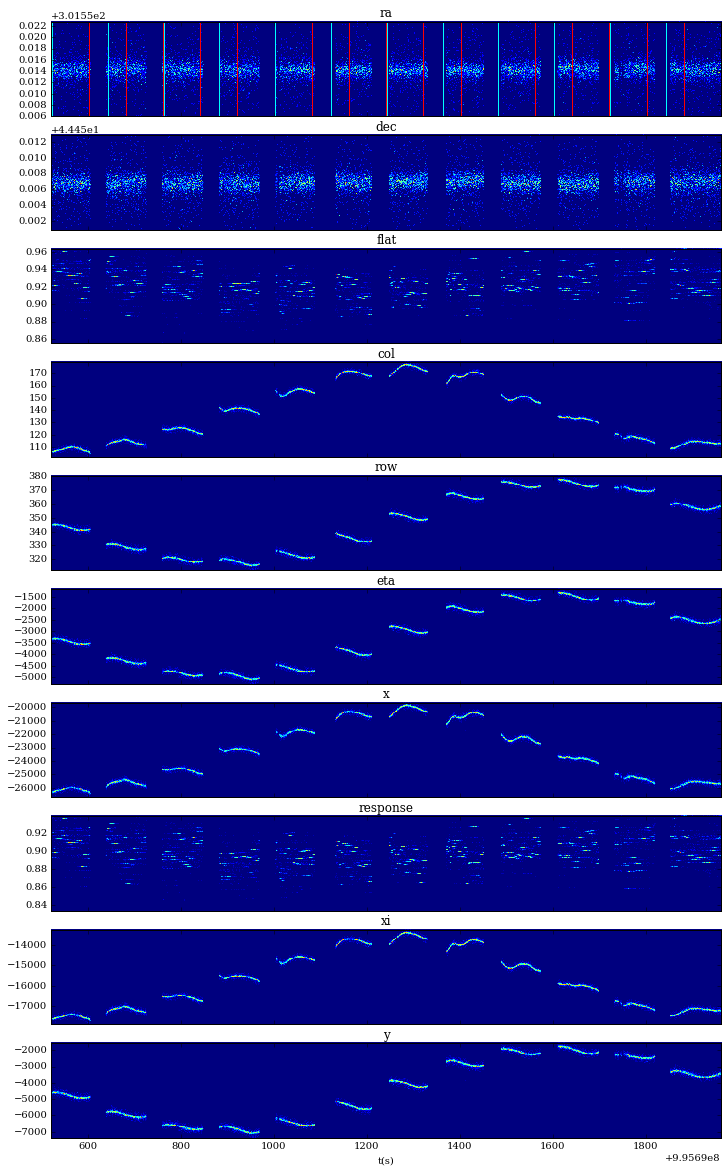

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fields=['ra', 'dec', 'flat', 'col', 'row', 'eta', 'x', 'response',  'xi', 'y']
fig,axes = plt.subplots(len(fields), 1, figsize=[12,20], sharex=True)
axes = axes.ravel()
for field,ax in zip(fields,axes):
    ax.hist2d(photons['t'],photons[field],bins=[1000,100])
    ax.set_title(field)

# mark the 80s periodicity in red
for t in np.arange(photons['t'][0],photons['t'][-1], 80):
    axes[0].axvline(t,color='r')
# mark 120 s interval in cyan
for t in np.arange(photons['t'][0]+1,photons['t'][-1], 120):
    axes[0].axvline(t,color='cyan')


axes[-1].set_xlabel('t(s)')
fig.savefig(target+'_photon_fields.png')

KeyError: 0

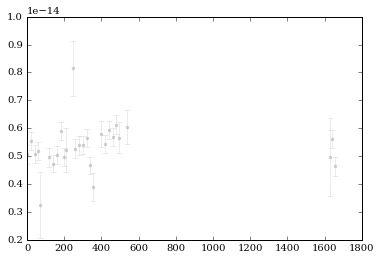

In [35]:
med_flux = np.array(np.zeros(len(exp_data['NUV']['t0'])), dtype='float')
med_flux_err = np.array(np.zeros(len(exp_data['NUV']['t0'])), dtype='float')

time_big = np.array([], dtype='float')
mag_big = np.array([], dtype='float')
flux_big = np.array([], dtype='float')

for k in range(len(exp_data['NUV']['t0'])):
    data = read_lc(target+ '_' +str(k)+"_lc.csv")
    med_flux[k] = np.nanmedian(data['flux_bgsub'])
    med_flux_err[k] = np.std(data['flux_bgsub'])

    time_big = np.append(time_big, data['t_mean'])
    flux_big = np.append(flux_big, data['flux_bgsub'])
    mag_big = np.append(mag_big, data['mag'])
    
    t0k = int(data['t_mean'][0])
    flg0 = np.where((data['flags'] == 0))[0]
    plt.figure()
    plt.errorbar(data['t_mean'] - t0k, data['flux_bgsub'], yerr=data['flux_bgsub_err'], 
             marker='.', linestyle='none', c='grey', alpha=0.3, lw=0.5)
    plt.errorbar(data['t_mean'][flg0] - t0k, data['flux_bgsub'][flg0], yerr=data['flux_bgsub_err'][flg0], 
             marker='.', linestyle='none')
    plt.xlabel('GALEX time (sec - '+str(t0k)+')')
    plt.ylabel('NUV Flux')
    plt.savefig(target+ '_' +str(k)+"_lc.png", dpi=150, bbox_inches='tight', pad_inches=0.25)
#     plt.close()

**Huh**... that 3rd panel looks like a nice long visit. Let's take a slightly closer look!

In [31]:
# k=2
# data = read_lc(target+ '_' +str(k)+"_lc.csv")

# t0k = int(data['t_mean'][0])
# plt.figure(figsize=(14,5))
# plt.errorbar(data['t_mean'] - t0k, data['flux_bgsub'], yerr=data['flux_bgsub_err'], marker='.', linestyle='none')
# plt.xlabel('GALEX time (sec - '+str(t0k)+')')
# plt.ylabel('NUV Flux')


Any *short* timescale variability of note? Let's use a Lomb-Scargle to make a periodogram!

(limited to the 10sec windowing I imposed... NOTE: gPhoton could easily go shorter, but S/N looks dicey)

Answer: Some interesting structure around 70-80 sec, but nothing super strong

**Update:** [David Wilson says](https://twitter.com/astrodave2/status/867495209537478656) that although there are significant pointing motions (which [Scott Flemming says](https://twitter.com/ScottWFleming/status/867473027709231104) do occur), they don't align with the ~80sec signal here. Short timescale may be interesting! However, [Keaton Bell says](https://twitter.com/astrokeat/status/867471075038433280) he saw no short timescale variations in optical last week...

**Update 2:** This ~80 sec structure seems to be present in the gPhoton data at all three of (9,10,11) second sampling, suggesting it is real.

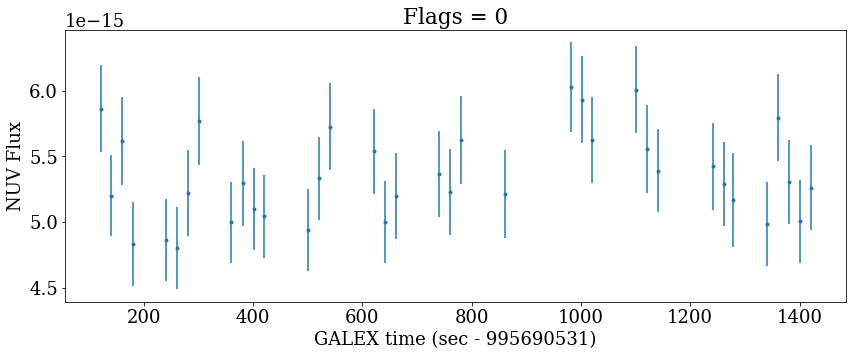

In [11]:
# try cutting on flags=0
flg0 = np.where((data['flags'] == 0))[0]
plt.figure(figsize=(14,5))
plt.errorbar(data['t_mean'][flg0] - t0k, data['flux_bgsub'][flg0], yerr=data['flux_bgsub_err'][flg0], 
             marker='.', linestyle='none')
plt.xlabel('GALEX time (sec - '+str(t0k)+')')
plt.ylabel('NUV Flux')
plt.title('Flags = 0')

(10, 500)

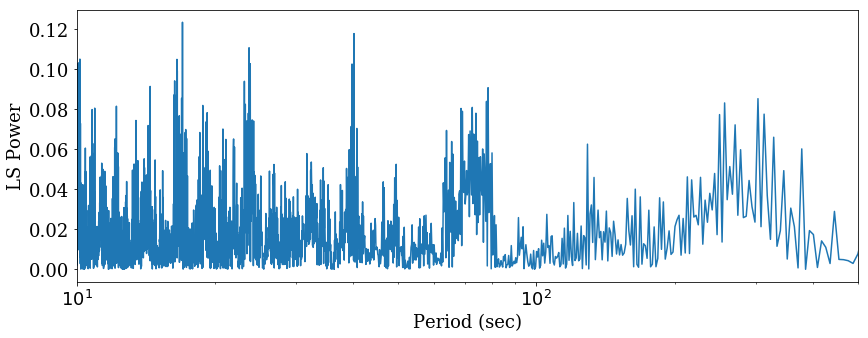

In [12]:
minper = 10 # my windowing
maxper = 10000
nper = 2000
pgram = LombScargleFast(fit_offset=False)
pgram.optimizer.set(period_range=(minper,maxper))

pgram = pgram.fit(time_big - min(time_big), flux_big - np.nanmedian(flux_big))

df = (1./minper - 1./maxper) / nper
f0 = 1./maxper

pwr = pgram.score_frequency_grid(f0, df, nper)

freq = f0 + df * np.arange(nper)
per = 1./freq

##
plt.figure(figsize=(14,5))
plt.plot(per, pwr)
plt.xlabel('Period (sec)')
plt.ylabel('LS Power')
plt.xscale('log')
plt.xlim(10,500)

How about the long-term evolution?

Answer: looks flat!

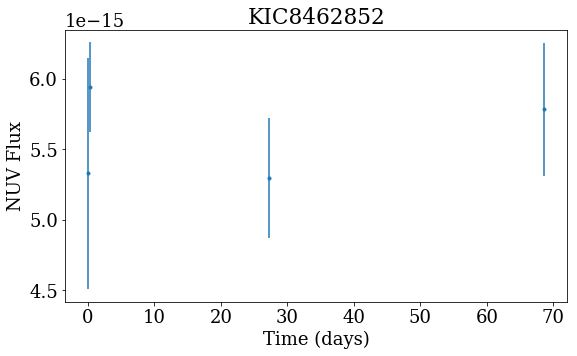

In [13]:
plt.figure(figsize=(9,5))
plt.errorbar((exp_data['NUV']['t0'] - exp_data['NUV']['t0'][0]) / (60.*60.*24.), med_flux, yerr=med_flux_err,
             linestyle='none', marker='.')
plt.xlabel('Time (days)')
plt.ylabel('NUV Flux')
plt.title(target)
plt.savefig(target+'.png', dpi=150, bbox_inches='tight', pad_inches=0.25)


## Conclusion...?
Based on data from only 4 GALEX visits, spaced over ~70 days, we can't say much possible evolution of this star with GALEX.

In [14]:
# average time of the gPhoton data
print(np.mean(exp_data['NUV']['t0']))
t_unix = Time(np.mean(exp_data['NUV']['t0']) + 315964800, format='unix')
t_date = t_unix.yday
print(t_date)

mjd_date = t_unix.mjd
print(mjd_date)

995416087.495
2011:204:00:28:07.495
55765.0195312


The visits are centered in mid 2011 (Quarter 9 and 10, I believe)

Note: there was a [special GALEX pointing at the Kepler field](http://galex.stsci.edu/gr6/?page=scanmode) that overlapped with Quarter 14 - approximately 1 year later. This data is not available via gPhoton, but it may be able to be used! The gPhoton data shown here occurs right *before* the "knee" in Figure 3 of [Montet & Simon (2016)](https://arxiv.org/abs/1608.01316), and Quarter 14 is well after. **Therefore a ~3% dip in the flux *should* be observed between this data and the Q14 visit**

However: the per-vist errors shown here (std dev) are around 6-10% for this target. If we co-add it all, we may get enough precision. The Q14 data apparently has 15 total scans... so the measurment may be borderline possible!

## Update: Out on a limb
I followed up on both the GALEX archival flux mearument, and the published scan-mode flux.

The GALEX source database from MAST (from which *I believe* gPhoton is derived) [says](http://galex.stsci.edu/GR6/?page=explore&photo=true&objid=3728666168841474091) m_NUV = 16.46 +/- 0.01

The "Deep GALEX NUV survey of the Kepler field" catalog by Olmedo (2015), aka GALEX CAUSE Kepler, [says](http://vizier.cfa.harvard.edu/viz-bin/VizieR-5?-ref=VIZ5925faa6255b&-out.add=.&-source=J/ApJ/813/100/table4&recno=660470) m_NUV = 16.499 +/- 0.006

Converting these <a href="https://en.wikipedia.org/wiki/Magnitude_(astronomy)"> magnitudes </a> to a change in flux:

    10^((16.46 - 16.499) / (-2.5)) = 1.03657
    
And if you trust all those catalog values as stated, here is a **highly suggestive** plot:

(16.52, 16.44)

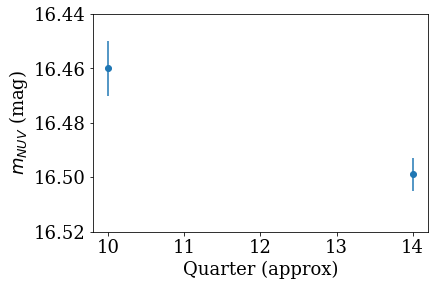

In [15]:
plt.errorbar([10, 14], [16.46, 16.499], yerr=[0.01, 0.006], linestyle='none', marker='o')
plt.xlabel('Quarter (approx)')
plt.ylabel(r'$m_{NUV}$ (mag)')
plt.ylim(16.52,16.44)

For time comparison, here is an example MJD from scan 15 of the GKM data.

(note: I grabbed a random time-like number from [here](http://archive.stsci.edu/pub/galex/KS/pipe/01-vsn/29214-KEPLER_SCAN_015/d/00-visits/0009-img/02-try/Out.txt). YMMV, but it's probably OK for comparing to the Kepler FFI results)

In [16]:
gck_time = Time(1029843320.995 + 315964800, format='unix')
gck_time.mjd

56163.48288188657

In [17]:
# and to push the comparison to absurd places...
# http://astro.uchicago.edu/~bmontet/kic8462852/reduced_lc.txt

df = pd.read_table('reduced_lc.txt', delim_whitespace=True, skiprows=1, 
                   names=('time','raw_flux', 'norm_flux', 'model_flux'))

# time = BJD-2454833
# *MJD = JD - 2400000.5

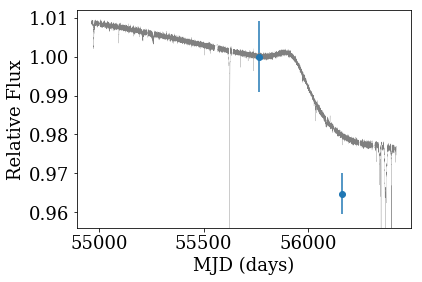

In [18]:
plt.plot(df['time'] + 2454833 - 2400000.5, df['model_flux'], c='grey', lw=0.2)

gtime = [mjd_date, gck_time.mjd]
gmag = np.array([16.46, 16.499])
gflux = np.array([1, 10**((gmag[1] - gmag[0]) / (-2.5))])
gerr = np.abs(np.array([0.01, 0.006]) * np.log(10) / (-2.5) * gflux)

plt.errorbar(gtime, gflux, yerr=gerr, 
             linestyle='none', marker='o')
plt.ylim(0.956,1.012)
plt.xlabel('MJD (days)')
plt.ylabel('Relative Flux')

plt.savefig(target+'_compare.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [42]:
# considering extinction... 
# w/ thanks to the Padova Isochrone page for easy shortcut to getting these extinction values:
# http://stev.oapd.inaf.it/cgi-bin/cmd

A_NUV = 2.27499 # actually A_NUV / A_V, in magnitudes
A_Kep = 0.85946 # actually A_Kep / A_V, in magnitudes

wave_NUV = 2556.69 # A
wave_Kep = 6389.68 # A

# frac_kep = 1 + (np.median(df['model_flux'][0:100]) - np.median(df['model_flux'][-100:]))
frac_kep = np.median(df['model_flux'][-100:])
print(frac_kep)
mag_kep = -2.5 * np.log10(frac_kep)

print(mag_kep)

mag_nuv = mag_kep / A_Kep * A_NUV
print(mag_nuv)

frac_nuv = 10**(mag_nuv / (-2.5))
print(frac_nuv)

0.975989866664
0.0263867285655
0.0698456514778
0.937695300442


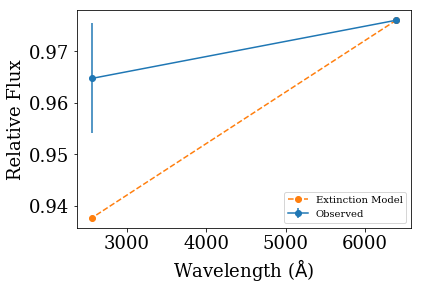

In [59]:
plt.errorbar([wave_Kep, wave_NUV], [frac_kep, gflux[1]], yerr=[0, np.sqrt(np.sum(gerr**2))], 
             label='Observed', marker='o')
plt.plot([wave_Kep, wave_NUV], [frac_kep, frac_nuv], '--o', label='Extinction Model')
plt.legend(fontsize=10, loc='lower right')
plt.xlabel(r'Wavelength ($\rm\AA$)')
plt.ylabel('Relative Flux')
plt.savefig(target+'_extinction_model.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [54]:
plt.legend?